In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tumblr-dataset/tumblr_e746450482dea345e2109ed97e58aebd_0a26c5fb_540.jpg


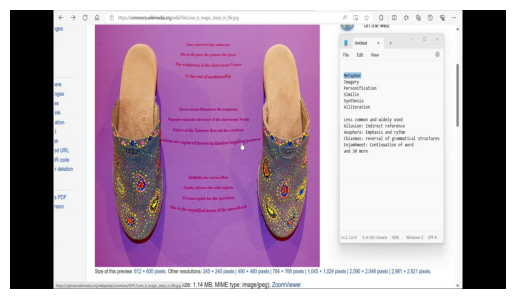

In [2]:
import cv2
import matplotlib.pyplot as plt

# Open the video file
video_path = 'https://mp4-c.udemycdn.com/2024-02-26_13-29-34-fa666f653eca292bd0b5fd6df29a3298/2/WebHD_720p.mp4?Expires=1732333582&Signature=hSQ-XwBeGaUoalaIKDFavN8mhAasvng3B1kOPxCCKJdm70uS0tkflN-sUK0QyywhUBkPDInWvGOnwmRSf50hpC1CGbWJ1ZUuG6~Xzjt1wrPK10vlNwDDGl4-RVOnmqSVueyJ7s55Gkn~g6nlgFOBZ9IPof-21T8i7OC9rPkbGPZG~l~TJCaFTrQXOzZPCcQ3NnVxYNjPtfzO-FqYlC71FYR9VtWvJOJVfteKuJpzk0RlAfdn1Wvpz~ZWSMePsuGtR~geTC78Aey-akXmbsIq2uXTfT-WnezvTSUhSM~5IShOry4~WNfaqyNpMNORg2zun12EhyIyMyFBOIKW4-Lcog__&Key-Pair-Id=K3MG148K9RIRF4'
cap = cv2.VideoCapture(video_path)

# Check if the video opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the total number of frames and the frame rate (fps) of the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the middle frame index
middle_frame_index = total_frames // 2

# Set the video to the middle frame
cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_index)

# Read the middle frame
ret, frame = cap.read()

if ret:
    # Convert the frame from BGR (OpenCV) to RGB (Matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the middle frame using Matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()
else:
    print("Error: Could not read the middle frame.")

# Release the video capture object
cap.release()


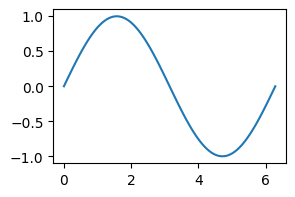

In [3]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Create the output widget for the plot
SalidaEjes = widgets.Output()

x = np.linspace(0, 2 * np.pi, 100)

with SalidaEjes:
    fig, ax = plt.subplots(figsize=(3, 2))
    line, = ax.plot(x, np.sin(x))

from IPython.display import YouTubeVideo

# Create the output widget for the YouTube video
SalidaVideo = widgets.Output()

# Use only the video ID
with SalidaVideo:
    display(YouTubeVideo('19DNfj80O5w'))  # Pass the video ID only

# Combine the outputs into a horizontal box layout
Salidas = widgets.HBox([SalidaEjes, SalidaVideo])
display(Salidas)


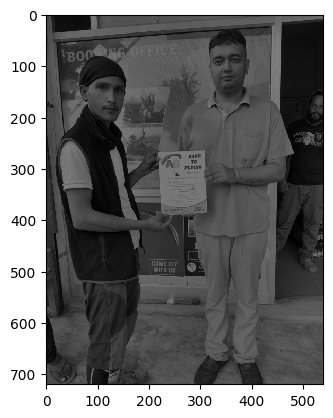

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# Load a single image
image_path = "/kaggle/input/tumblr-dataset/tumblr_e746450482dea345e2109ed97e58aebd_0a26c5fb_540.jpg"  # Replace with your image file path
img = np.array(Image.open(image_path).convert("L"))  # Convert to grayscale

# Create a figure and axis
fig, ax = plt.subplots()
image_display = ax.imshow(img, cmap="gray", interpolation="nearest")

# Define an update function for the animation
def update(frame):
    # Adjust brightness dynamically (sinusoidal variation)
    factor = 0.5 + 0.5 * np.sin(frame / 10)
    brightened_img = np.clip(img * factor, 0, 255)
    image_display.set_data(brightened_img)
    return image_display,

# Create the animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

plt.show()


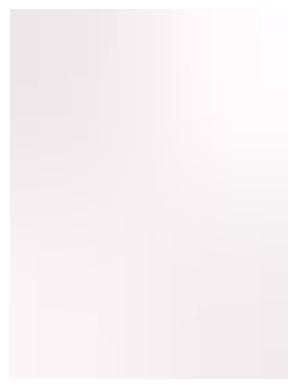

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
from scipy.ndimage import rotate

# Load a single image
image_path = "/kaggle/input/tumblr-dataset/tumblr_e746450482dea345e2109ed97e58aebd_0a26c5fb_540.jpg"  # Replace with your image file path
img = np.array(Image.open(image_path))

# Create a figure and axis
fig, ax = plt.subplots()
ax.axis("off")  # Turn off axes for a cleaner video
image_display = ax.imshow(img)

# Define an update function for the animation
def update(frame):
    # Apply rotation and zoom
    angle = frame  # Rotate by `frame` degrees
    scale = 1 + 0.01 * frame  # Gradually zoom in
    rotated_img = rotate(img, angle=angle, reshape=False)
    
    # Apply scaling (crop and resize)
    center = np.array(rotated_img.shape) // 2
    crop_size = int(min(rotated_img.shape) / scale)
    cropped_img = rotated_img[
        center[0] - crop_size // 2 : center[0] + crop_size // 2,
        center[1] - crop_size // 2 : center[1] + crop_size // 2
    ]
    
    # Resize back to original size
    if cropped_img.shape[0] > 0 and cropped_img.shape[1] > 0:
        zoomed_img = np.array(Image.fromarray(cropped_img).resize(img.shape[:2][::-1]))
        image_display.set_data(zoomed_img)
    return image_display,

# Create the animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Save the animation as a video
ani.save("animated_video.mp4", writer="ffmpeg", fps=20)

plt.show()
